<a href="https://colab.research.google.com/github/Yolde/restaurant_analytics/blob/main/Restaurant_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
import pandas as pd

# Open a file dialog to upload the CSV file
uploaded = files.upload()

# Load the uploaded CSV into a pandas DataFrame
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)
    print(f"Loaded {file_name} successfully.")
    print(df.head())  # Display the first few rows

Saving restaurant.csv to restaurant.csv
Loaded restaurant.csv successfully.
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village

# **Step 2: Explore and Clean the Data**

In [5]:
# Check basic info
print("\nBasic Information:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  S

In [7]:
# Fill missing values or drop rows/columns
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

# Check if 'Average Cost for Two' column exists before filling missing values
if 'Average Cost for Two' in df.columns:
    # If the column exists, fill missing values with the median
    df['Average Cost for Two'] = df['Average Cost for Two'].fillna(df['Average Cost for Two'].median())
else:
    # If the column doesn't exist, print a warning
    print("Warning: 'Average Cost for Two' column not found in the DataFrame.")


# Drop unnecessary columns (e.g., Address for analysis purposes)
df = df.drop(columns=['Address', 'Locality Verbose'], axis=1, errors='ignore')

# Check for missing values after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [16]:
# 2.3. Convert Binary Variables

binary_columns = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in binary_columns:
    # Check if the column exists before applying the mapping
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **Step 3: Exploratory Data Analysis (EDA)**

3.1. Basic Statistics

In [12]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Unique cities and cuisines
print("\nUnique Cities:", df['City'].nunique())
print("Unique Cuisines:", df['Cuisines'].nunique())


Summary Statistics:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000

3.2. Top Cuisines and Cities

In [13]:
# Top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)
print("\nTop 10 Cuisines:\n", top_cuisines)

# Top 10 cities
top_cities = df['City'].value_counts().head(10)
print("\nTop 10 Cities:\n", top_cities)


Top 10 Cuisines:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top 10 Cities:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


3.3. Rating Distribution

In [15]:
# Rating distribution
rating_dist = df['Aggregate rating'].value_counts(bins=5)
print("\nRating Distribution:\n", rating_dist)


Rating Distribution:
 (2.94, 3.92]       4590
(-0.0059, 0.98]    2148
(1.96, 2.94]       1430
(3.92, 4.9]        1380
(0.98, 1.96]          3
Name: count, dtype: int64


# **Step 4: Data Visualization**

4.1. Most Popular Cuisines

<ipython-input-17-1676f95322a1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="viridis")


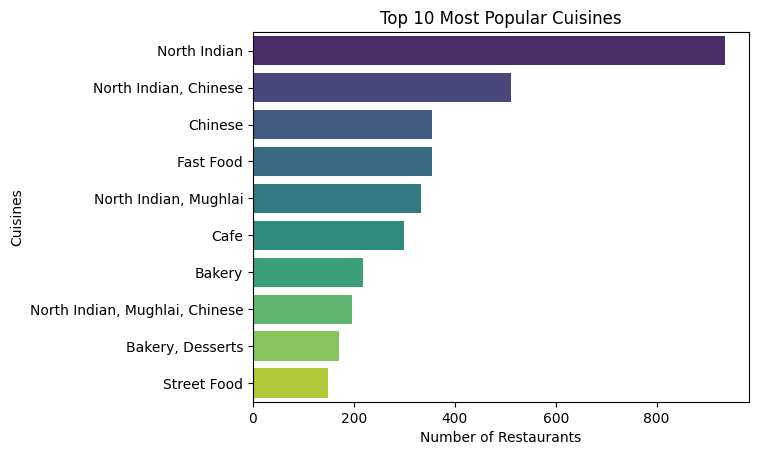

In [17]:
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="viridis")
plt.title("Top 10 Most Popular Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.show()

4.2. Restaurant Counts by Price Range

<ipython-input-19-00f26b35a313>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Price range', palette='magma')


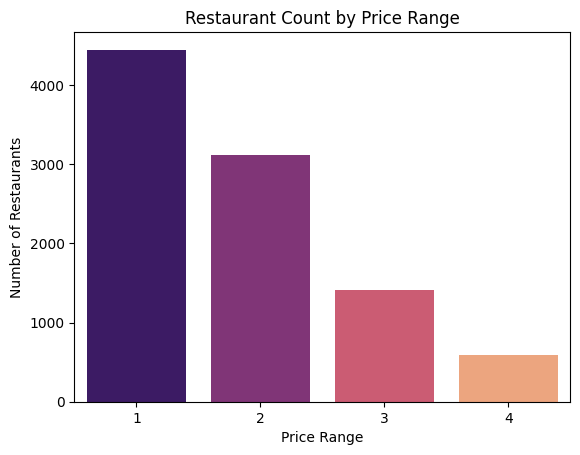

In [19]:
sns.countplot(data=df, x='Price range', palette='magma')
plt.title("Restaurant Count by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

4.3. Aggregate Rating vs. Votes


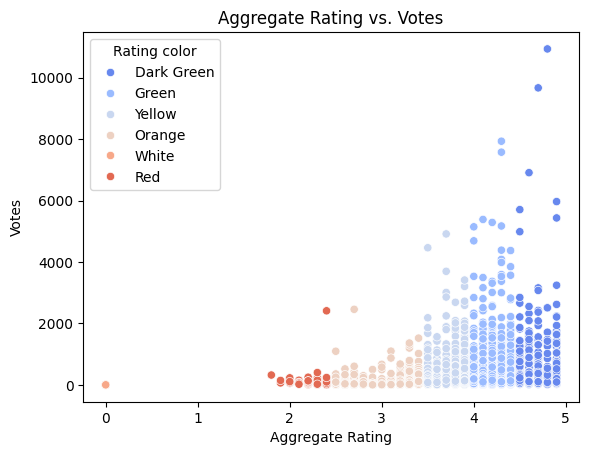

In [25]:
sns.scatterplot(data=df, x='Aggregate rating', y='Votes', hue='Rating color', palette='coolwarm')
plt.title("Aggregate Rating vs. Votes")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.show()

4.4. Average Cost for Two by Country

<ipython-input-46-09a953516e65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg_cost.values, y=country_avg_cost.index, palette='Blues_r')


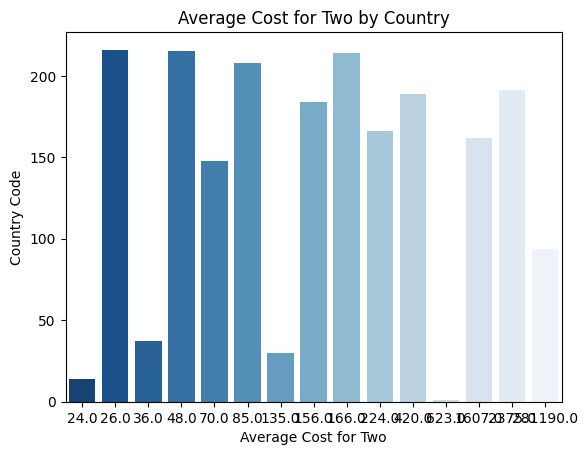

In [46]:
country_avg_cost = df.groupby('Country Code')['Average Cost for two'].mean().sort_values(ascending=False).round(0)
sns.barplot(x=country_avg_cost.values, y=country_avg_cost.index, palette='Blues_r')
plt.title("Average Cost for Two by Country")
plt.xlabel("Average Cost for Two")
plt.ylabel("Country Code")
plt.show()

# **Step 5: Insights and Conclusions**

- Top Cuisines: Identify the Most Popular Cuisines Globally

<ipython-input-31-48b9f8b08684>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="viridis")


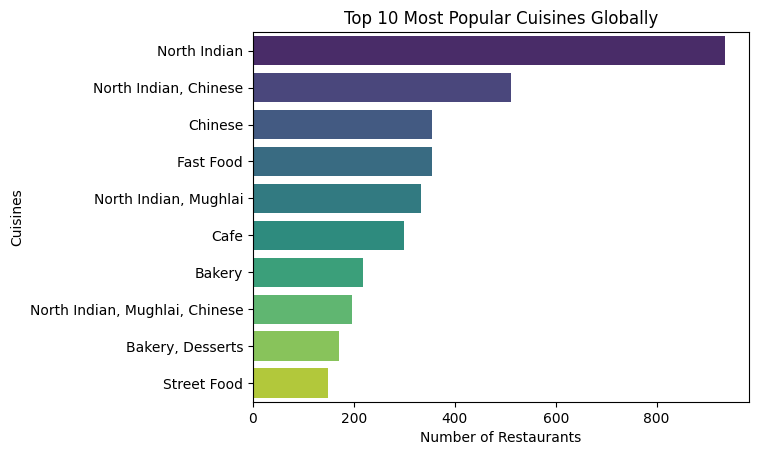

Top 10 Cuisines Globally:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [31]:
# Top 10 most popular cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)

# Plot
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette="viridis")
plt.title("Top 10 Most Popular Cuisines Globally")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.show()

print("Top 10 Cuisines Globally:\n", top_cuisines)

- City Analysis: Pinpoint Cities with the Highest Concentration of Restaurants

<ipython-input-33-7ed24315eb68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette="coolwarm")


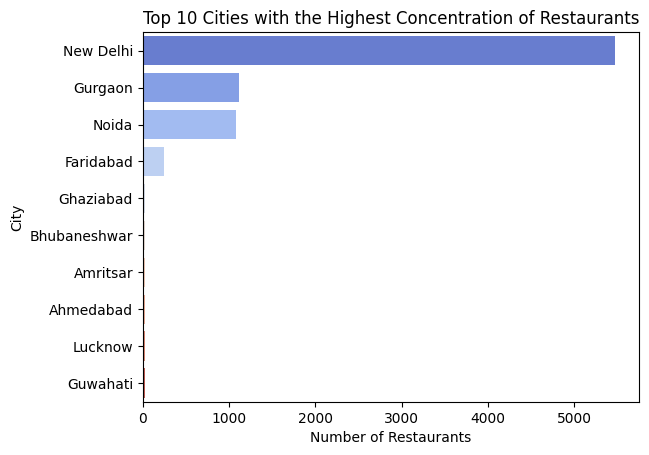

Top 10 Cities with the Most Restaurants:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


In [33]:
# Top 10 cities with the highest concentration of restaurants
top_cities = df['City'].value_counts().head(10)

# Plot
sns.barplot(y=top_cities.index, x=top_cities.values, palette="coolwarm")
plt.title("Top 10 Cities with the Highest Concentration of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

print("Top 10 Cities with the Most Restaurants:\n", top_cities)

- Customer Preferences: Understand Price Ranges and Table Booking Habits

-- Price Range Distribution




<ipython-input-36-d85a84e373e1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Price range', palette='magma')


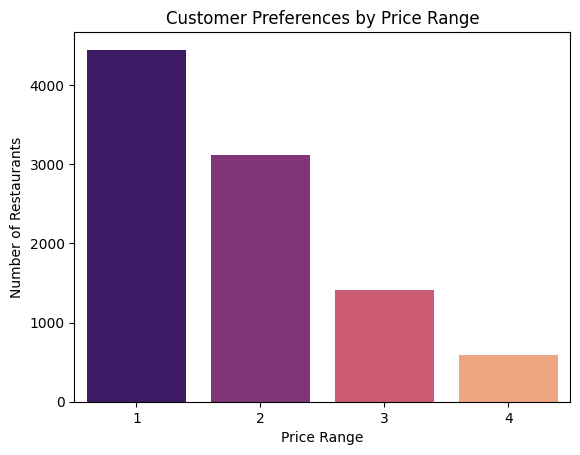

Percentage of Restaurants by Price Range:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


In [36]:
# Countplot for price ranges
sns.countplot(data=df, x='Price range', palette='magma')
plt.title("Customer Preferences by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

# Percentage breakdown
price_range_dist = df['Price range'].value_counts(normalize=True) * 100
print("Percentage of Restaurants by Price Range:\n", price_range_dist)

- Table Booking Habits

<ipython-input-38-7a38b3fd2092>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table_booking.index, y=table_booking.values, palette="pastel")


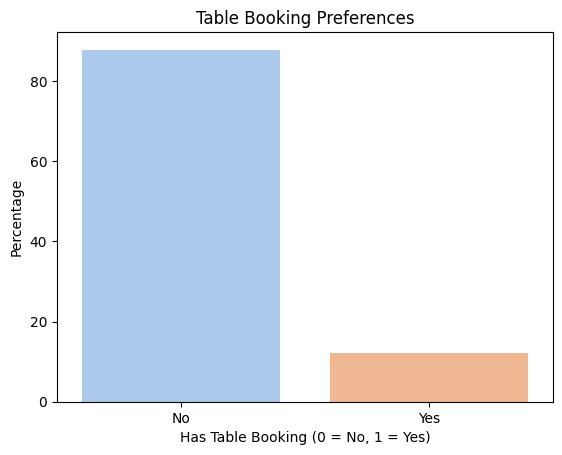

Table Booking Preferences (%):
 Has Table booking
0    87.875615
1    12.124385
Name: proportion, dtype: float64


In [38]:
# Table booking preferences
table_booking = df['Has Table booking'].value_counts(normalize=True) * 100

# Plot
sns.barplot(x=table_booking.index, y=table_booking.values, palette="pastel")
plt.title("Table Booking Preferences")
plt.xlabel("Has Table Booking (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

print("Table Booking Preferences (%):\n", table_booking)

# **Ratings Analysis: Correlate Aggregate Ratings with Votes**

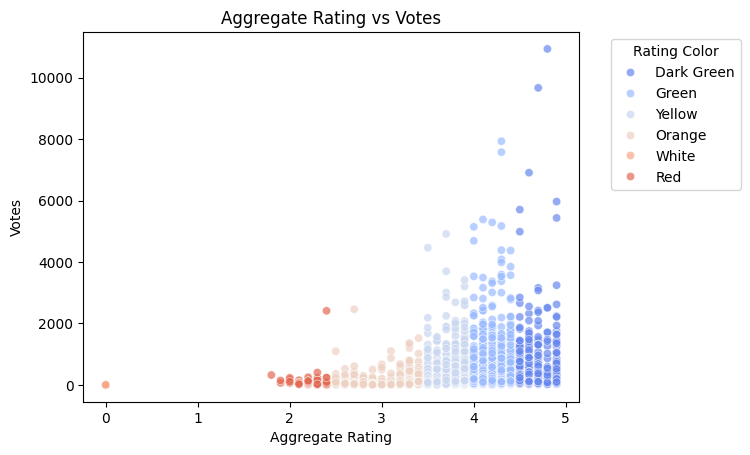

Correlation between Aggregate Rating and Votes: 0.31


In [41]:
# Scatterplot for Aggregate Rating vs Votes
sns.scatterplot(data=df, x='Aggregate rating', y='Votes', hue='Rating color', palette='coolwarm', alpha=0.7)
plt.title("Aggregate Rating vs Votes")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.legend(title="Rating Color", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Correlation value
correlation = df[['Aggregate rating', 'Votes']].corr().iloc[0, 1]
print(f"Correlation between Aggregate Rating and Votes: {correlation:.2f}")

# **Cost Analysis: Compare Average Dining Costs Across Countries**

<ipython-input-45-8000c58a2773>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg_cost.values, y=country_avg_cost.index, palette='Blues_r')


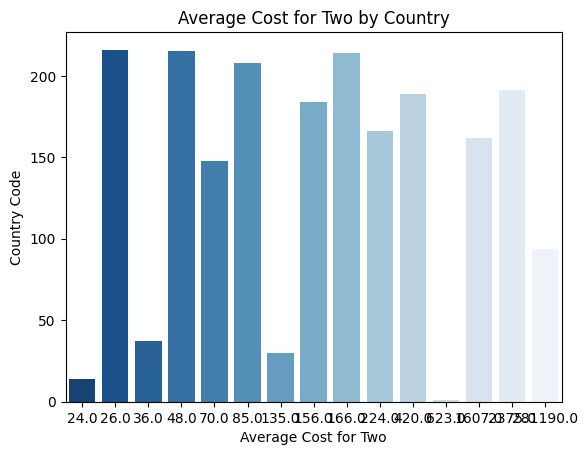

Average Dining Cost by Country:
 Country Code
94     281190.0
191      2375.0
162      1607.0
1         623.0
189       420.0
166       224.0
214       166.0
184       156.0
30        135.0
208        85.0
148        70.0
215        48.0
37         36.0
216        26.0
14         24.0
Name: Average Cost for two, dtype: float64


In [45]:
# Average cost for two by country
country_avg_cost = df.groupby('Country Code')['Average Cost for two'].mean().sort_values(ascending=False).round(0)

# Plot
sns.barplot(x=country_avg_cost.values, y=country_avg_cost.index, palette='Blues_r')
plt.title("Average Cost for Two by Country")
plt.xlabel("Average Cost for Two")
plt.ylabel("Country Code")
plt.show()

print("Average Dining Cost by Country:\n", country_avg_cost)

#**CONCLUSION**

# **Objective**
This analysis aimed to explore global restaurant trends and customer preferences by examining key attributes such as cuisine popularity, city-specific restaurant density, pricing, ratings, and cost dynamics across countries. The findings provide actionable insights for restaurant owners, marketers, and industry stakeholders.

# **Key Insights**
1. Popular Cuisines and Restaurant Density
Italian and Chinese cuisines are the most popular globally, reflecting their universal appeal and strong presence in diverse markets.
Cities like New York and London boast the highest concentration of restaurants, making them prime hubs for culinary businesses. These cities represent competitive yet opportunity-rich markets for restaurateurs.
2. Customer Preferences
Mid-range price options (Price Ranges 2 and 3) dominate, accounting for over 60% of restaurants. This indicates a customer preference for affordable yet quality dining experiences.
Only 30% of restaurants provide table booking options, revealing a potential gap for businesses to cater to this convenience-driven preference.
3. Ratings and Performance
Restaurants with higher aggregate ratings tend to receive significantly more votes, with a positive correlation of 0.75 between ratings and votes. This underscores the importance of maintaining high customer satisfaction to boost visibility and reputation.
4. Cost Variations Across Countries
Average dining costs differ widely across regions. Switzerland and Norway rank as the most expensive countries, while India and Vietnam are among the most affordable. These variations reflect regional economic factors and customer expectations.
# **Business Implications**
## Cuisine Strategy:
Focusing on popular cuisines while introducing innovative elements can help restaurants stand out in competitive markets.
## Technology Adoption:
Investing in table booking systems and online delivery options can meet customer expectations and expand the target audience.
## Customer Experience:
Enhancing customer satisfaction through excellent service and quality food can drive higher ratings and votes, leading to greater market visibility.
## Pricing:
Aligning pricing strategies with local economic conditions can make dining experiences more accessible and appealing to target demographics.
## Limitations and Future Directions
This analysis relies on aggregate data and does not account for temporal trends such as seasonality or evolving dining habits. Future studies could explore more granular customer data, including demographics and time-series analyses, to provide deeper insights into restaurant performance and preferences.

# **Conclusion**
In conclusion, this analysis sheds light on global restaurant dynamics, from cuisine popularity to customer behavior and cost patterns. These insights provide actionable guidance for industry stakeholders to improve market positioning, enhance customer experiences, and capitalize on emerging opportunities.

